In [ ]:
Foll# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Neccessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
plt.style.use('seaborn')

In [ ]:
plt.style.use('default')  # Revert to the default Matplotlib style
# OR
# Choose a valid style from the available options
# print(plt.style.available) # Uncomment to see a list of available styles
plt.style.use('ggplot')
warnings.simplefilter('ignore', category=FutureWarning)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

#**Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Research group/CSE 498R dataset/AIDS_Classification.csv')

In [ ]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0


# **Data Description**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [ ]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

# **Data profiling**

In [ ]:
# prompt: install freeze

!pip freeze| grep pandas-profiling

In [ ]:
# prompt: install pandas profiling

!pip install ydata-profiling

In [ ]:
# prompt: panda profiling
# Upgrade ydata_profiling
!pip install --upgrade ydata_profiling

# Check for conflicting installations
!pip show ydata_profiling

# Import the correct function
from ydata_profiling import ProfileReport

# Profile the DataFrame
profile = ProfileReport(df)

# Display the profile report
profile.to_file(output_file="prediction profiling.html")

# **Exploratory Data Analysis**

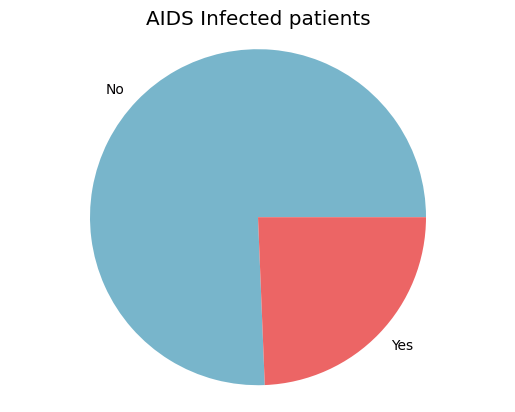

In [ ]:
value_counts = df["infected"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#78B5CB', '#EC6565'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('AIDS Infected patients')

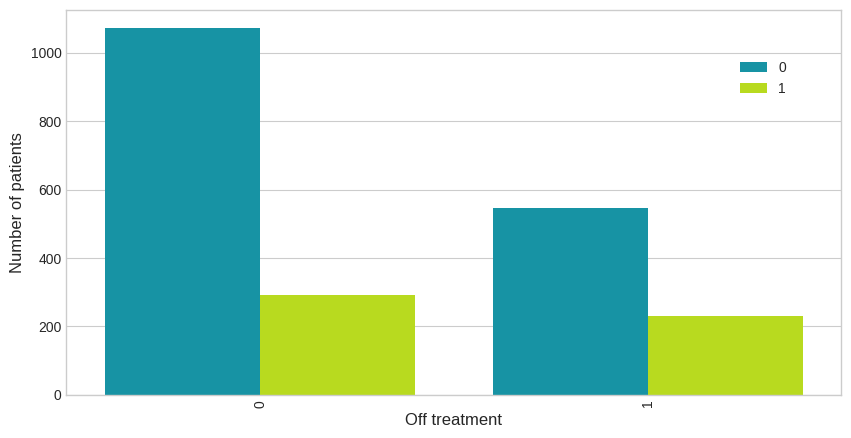

In [ ]:
# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="offtrt", hue="infected", data=df, palette="nipy_spectral",
              order=df.offtrt.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Off treatment", ylabel="Number of patients")
plt.legend(bbox_to_anchor=(0.945, 0.90))

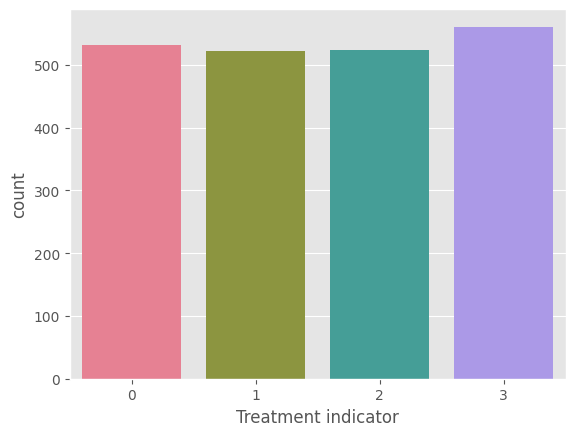

In [ ]:
sns.countplot(data = df, x = 'trt', palette = 'husl')
plt.xlabel('Treatment indicator')
plt.show()

## kde plot of the interrelation between cd40,cd420,cd80 and cd820

<Axes: xlabel='cd40', ylabel='Density'>

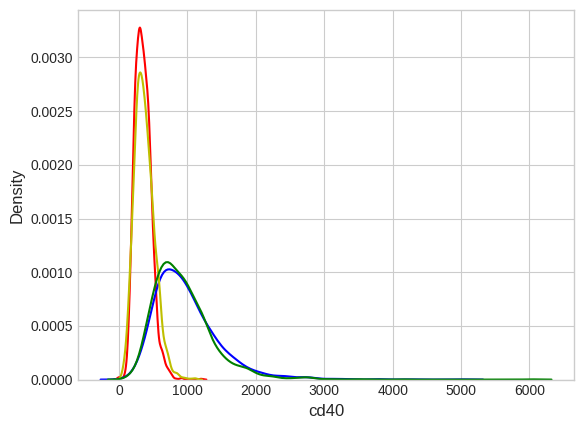

In [ ]:
# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

sns.kdeplot(df, x = 'cd40', color = 'r')
sns.kdeplot(df, x = 'cd80', color = 'b')
sns.kdeplot(df, x = 'cd420', color = 'y')
sns.kdeplot(df, x = 'cd820', color = 'g')

# **Data Preprocessing**

In [ ]:
len(df.columns)

23

In [ ]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [ ]:
# Because of the lack of information, the 'time' column has been droped.
#df.drop(columns=['time'],inplace=True)

In [ ]:
print(df.columns)
print(len(df.columns))

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')
23


## Heatmap of the missing values in some features

<Axes: >

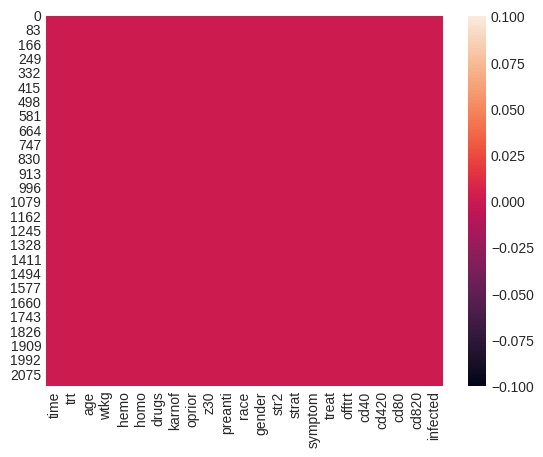

In [ ]:
sns.heatmap(df[df.columns].isna() )

In [ ]:
df.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,948,2,48,89.8128,0,0,0,100,0,0,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1352,0,1,1,3,0,0,0,504,353,870,782,0
5,1181,1,46,88.9056,0,1,1,100,0,1,1181,0,1,1,3,0,1,0,235,339,860,1060,0
6,794,0,31,73.0296,0,1,0,100,0,1,930,0,1,1,3,0,0,0,244,225,708,699,1
7,957,0,41,66.2256,0,1,1,100,0,1,1329,0,1,1,3,0,0,0,401,366,889,720,0
8,198,3,40,82.5552,0,1,0,90,0,1,1074,0,1,1,3,1,1,1,214,107,652,131,1
9,188,0,35,78.0192,0,1,0,100,0,1,964,0,1,1,3,0,0,1,221,132,221,759,1


In [ ]:
#Null values checking after handling missing values of all column
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values


## Boxplotting before handling outliers

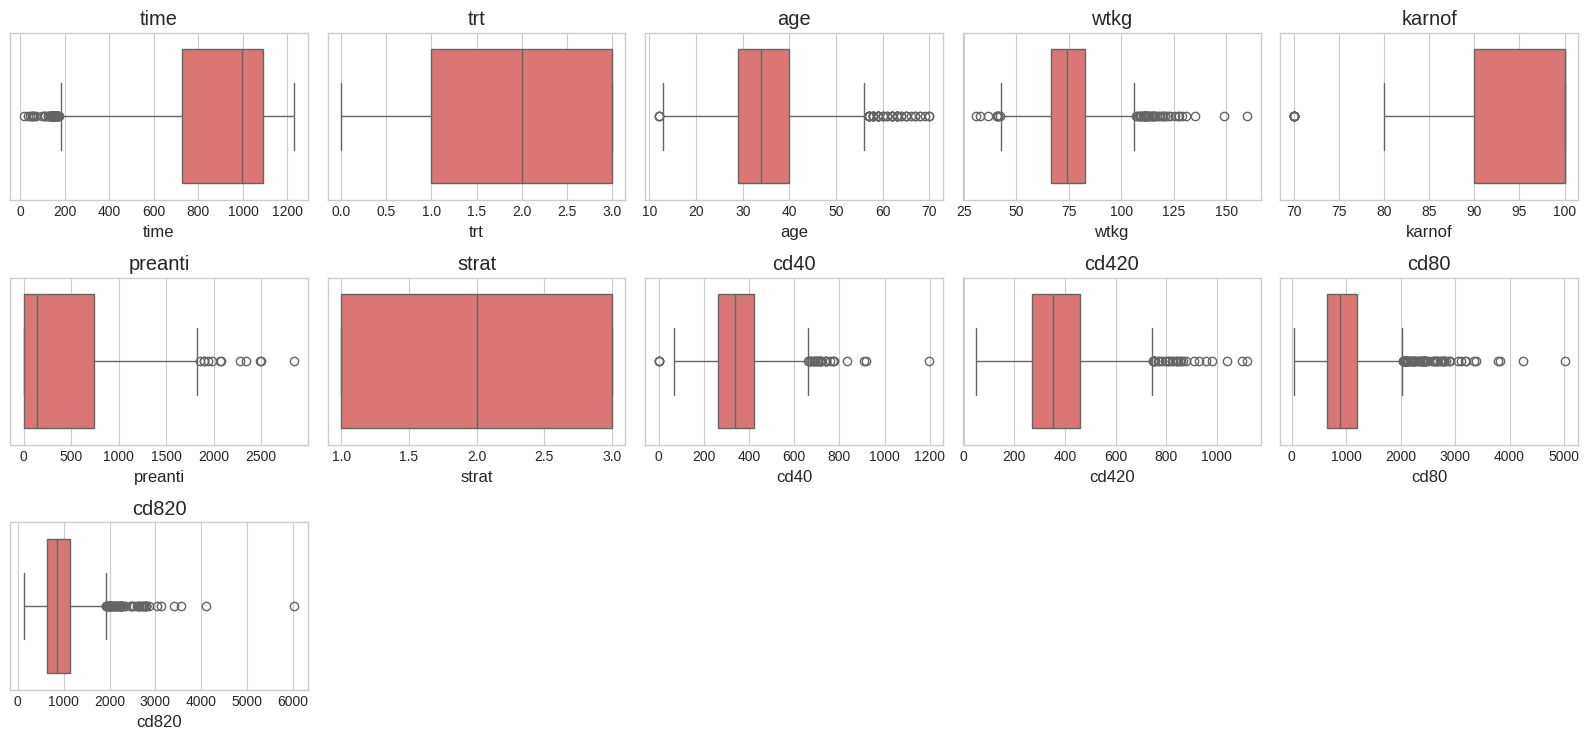

In [ ]:
# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

# prompt: make green color of these outlier boxes

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

numeric_columns = [col for col in numeric_columns if df[col].min() != 0 or df[col].max() != 1]


plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[col], color='#EC6565')
    plt.title(col)

plt.tight_layout()
plt.show()

## Boxplotting after handling outliers

In [ ]:
outlier_columns_to_check = ['age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

In [ ]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df


In [ ]:
for column in outlier_columns_to_check:
    df = handle_outliers(df, column)

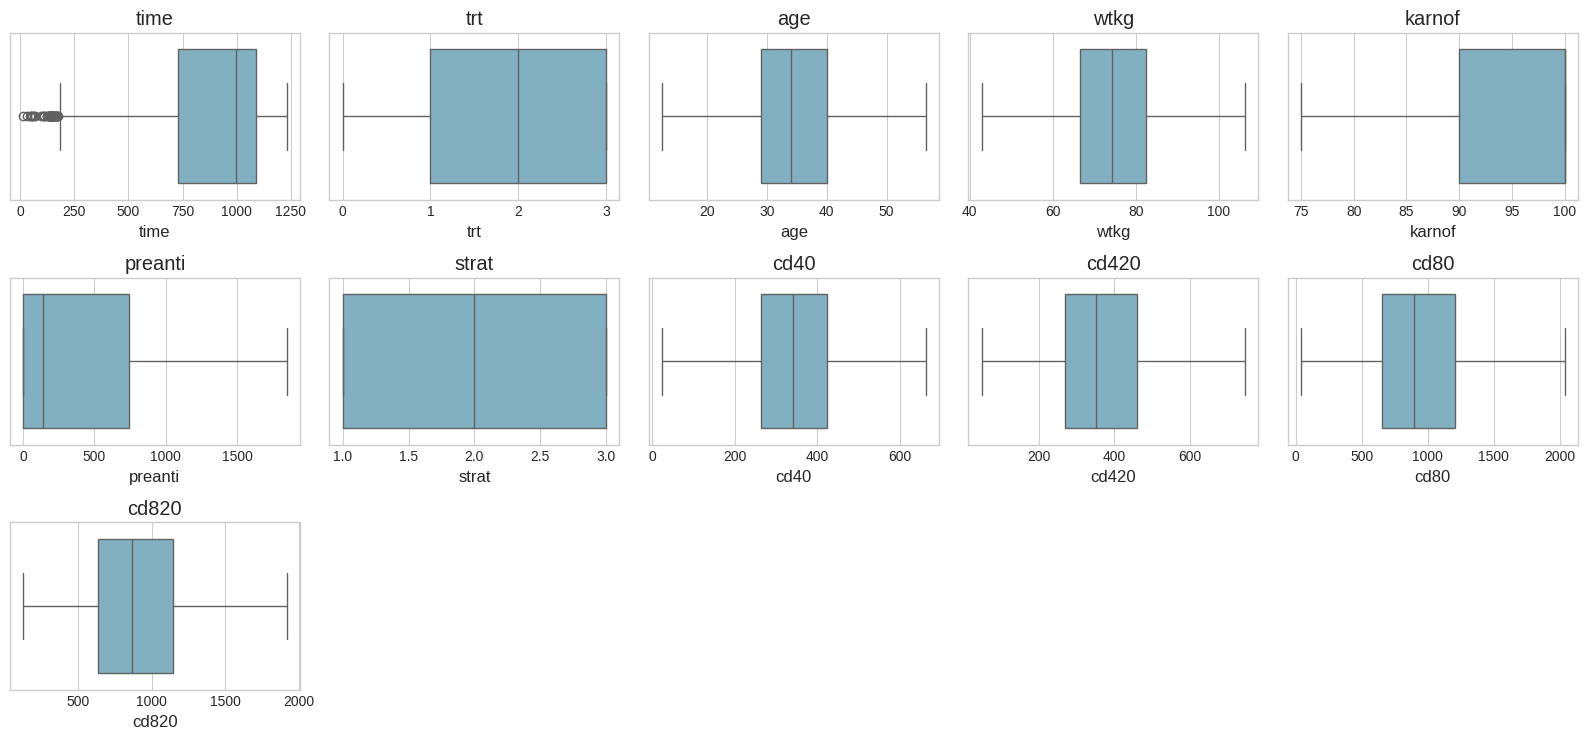

In [ ]:
# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

# numeric_columns = ['trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti',
#                    'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'infected']

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

numeric_columns = [col for col in numeric_columns if df[col].min() != 0 or df[col].max() != 1]


plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x=df[col],color='#78B5CB')
    plt.title(col)

plt.tight_layout()
plt.show()

# **Feature Engineering Analysis**

## New wtkg_age_ratio,cd4_cd8_ratio and cd420_cd820_ratio features

In [ ]:
# 1. Weight-to-Age Ratio
df['wtkg_age_ratio'] = df['wtkg'] / df['age']

# 2. CD4 to CD8 Ratio
df['cd4_cd8_ratio'] = df['cd40'] / df['cd80']

# 3. CD420 to CD820 Ratio
df['cd420_cd820_ratio'] = df['cd420'] / df['cd820']


In [ ]:
# Display the first few rows to check the new features
print(df[['wtkg_age_ratio', 'cd4_cd8_ratio','cd420_cd820_ratio']].head())

   wtkg_age_ratio  cd4_cd8_ratio  cd420_cd820_ratio
0        1.871100       0.745583           1.472222
1        0.875087       0.413265           0.386525
2        1.965600       0.160079           0.144744
3        1.814400       0.180503           0.407867
4        1.550679       0.579310           0.451407


## New symptom_severity and immune index features

In [ ]:
# This index combines symptom severity, hemoglobin levels, and weight into a single metric.
df['symptom_severity'] = df['symptom'] + 2 * df['hemo'] + df['wtkg']

# This index combines CD4+ and CD8+ T-cell counts, adjusted by another related marker.
df['immune_index'] = df['cd40'] * df['cd80'] / df['cd420']

In [ ]:
# Display the first few rows to check the new features
print(df[['symptom_severity', 'immune_index']].head())

   symptom_severity  immune_index
0           89.8128    500.737945
1           49.4424    291.302752
2           88.4520   2422.989051
3           85.2768   1158.197970
4           66.6792   1242.152975


In [ ]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected', 'wtkg_age_ratio', 'cd4_cd8_ratio', 'cd420_cd820_ratio',
       'symptom_severity', 'immune_index'],
      dtype='object')

## cd40,cd80,cd420 and cd820 Z score standardization features

In [ ]:
df['z_cd40'] = (df['cd40'] - df['cd40'].mean()) / df['cd40'].std()
df['z_cd80'] = (df['cd80'] - df['cd80'].mean()) / df['cd80'].std()
df['z_cd420'] = (df['cd420'] - df['cd420'].mean()) / df['cd420'].std()
df['z_cd820'] = (df['cd820'] - df['cd820'].mean()) / df['cd820'].std()

In [ ]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected', 'wtkg_age_ratio', 'cd4_cd8_ratio', 'cd420_cd820_ratio',
       'symptom_severity', 'immune_index', 'z_cd40', 'z_cd80', 'z_cd420',
       'z_cd820'],
      dtype='object')

In [ ]:
#Null values checking after handling missing values of all column
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values


## New time_treat_interaction and time_symptom interaction feature

In [ ]:
# Create interaction feature between time and treatment
df['time_treat_interaction'] = df['time'] * df['trt']


df['time_symptom_interaction'] = df['time'] * df['symptom']

## New time_cd40_interaction and time_cd420_interaction feature

In [ ]:
df['time_cd40_interaction'] = df['time'] * df['cd40']
df['time_cd420_interaction'] = df['time'] * df['cd420']

## New time_cd80_interaction and time_cd820_interaction feacture

In [ ]:
df['time_cd80_interaction'] = df['time'] * df['cd80']
df['time_cd820_interaction'] = df['time'] * df['cd820']

## Checking negative values

In [ ]:
# prompt: checking negative value

# Check for negative values in the entire DataFrame
negative_values = (df < 0).sum()

# Display columns with negative values and their counts
print(negative_values[negative_values > 0])


z_cd40     1133
z_cd80     1215
z_cd420    1151
z_cd820    1202
dtype: int64


In [ ]:
# prompt: replace all negative with absolute value

df = df.abs()

In [ ]:
# prompt: checking negative value

# Check for negative values in the entire DataFrame
negative_values = (df < 0).sum()

# Display columns with negative values and their counts
print(negative_values[negative_values > 0])

Series([], dtype: int64)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      2139 non-null   int64  
 1   trt                       2139 non-null   int64  
 2   age                       2139 non-null   float64
 3   wtkg                      2139 non-null   float64
 4   hemo                      2139 non-null   int64  
 5   homo                      2139 non-null   int64  
 6   drugs                     2139 non-null   int64  
 7   karnof                    2139 non-null   float64
 8   oprior                    2139 non-null   int64  
 9   z30                       2139 non-null   int64  
 10  preanti                   2139 non-null   float64
 11  race                      2139 non-null   int64  
 12  gender                    2139 non-null   int64  
 13  str2                      2139 non-null   int64  
 14  strat   

In [ ]:
# prompt: save the excel file to drive

# Save the DataFrame to an Excel file in your Google Drive
df.to_excel('/content/drive/My Drive/my_file.xlsx', index=False)

## Feature scaling

In [ ]:
# prompt: make all column in the range of 0-1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['preanti','symptom_severity', 'immune_index']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [ ]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected,wtkg_age_ratio,cd4_cd8_ratio,cd420_cd820_ratio,symptom_severity,immune_index,z_cd40,z_cd80,z_cd420,z_cd820,time_treat_interaction,time_symptom_interaction,time_cd40_interaction,time_cd420_interaction,time_cd80_interaction,time_cd820_interaction
0,948,2,48.0,89.8128,0,0,0,100.0,0,0,0.000000,0,0,0,1,0,1,0,422.0,477.0,566.0,324.0,0,1.871100,0.745583,1.472222,0.716713,0.072077,0.635137,0.962557,0.766086,1.546165,1896,0,400056.0,452196.0,536568.0,307152.0
1,1002,3,56.5,49.4424,0,0,0,90.0,0,1,0.484111,0,0,1,3,0,1,0,162.0,218.0,392.0,564.0,1,0.875087,0.413265,0.386525,0.100409,0.040204,1.639108,1.377696,1.086127,0.923962,3006,0,162324.0,218436.0,392784.0,565128.0
2,961,3,45.0,88.4520,0,1,1,90.0,0,1,0.382421,0,1,1,3,0,1,1,326.0,274.0,2036.5,1893.0,0,1.965600,0.160079,0.144744,0.695939,0.364611,0.204585,2.545848,0.685648,2.521489,2883,0,313286.0,263314.0,1957076.5,1819173.0
3,1166,3,47.0,85.2768,0,1,0,100.0,0,1,0.756728,0,1,1,3,0,1,0,287.0,394.0,1590.0,966.0,0,1.814400,0.180503,0.407867,0.647466,0.172131,0.545721,1.480562,0.172520,0.118229,3498,0,334642.0,459404.0,1853940.0,1126356.0
4,1090,0,43.0,66.6792,0,1,0,100.0,0,1,0.731305,0,1,1,3,0,0,0,504.0,353.0,870.0,782.0,0,1.550679,0.579310,0.451407,0.363550,0.184908,1.352399,0.237256,0.120688,0.358794,0,0,549360.0,384770.0,948300.0,852380.0


## Drop time feature

In [ ]:
# prompt: drop time column

df.drop(columns=['time'],inplace=True)
print(df.columns)


Index(['trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior',
       'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat',
       'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'infected',
       'wtkg_age_ratio', 'cd4_cd8_ratio', 'cd420_cd820_ratio',
       'symptom_severity', 'immune_index', 'z_cd40', 'z_cd80', 'z_cd420',
       'z_cd820', 'time_treat_interaction', 'time_symptom_interaction',
       'time_cd40_interaction', 'time_cd420_interaction',
       'time_cd80_interaction', 'time_cd820_interaction'],
      dtype='object')


# **Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = df.drop('infected', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'

y = df['infected'] # Output/Dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# lets print the shapes again
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (1711, 36)
Shape of the y Train : (1711,)
Shape of the X test : (428, 36)
Shape of the y test : (428,)


In [ ]:
import pandas as pd

# Check for missing values in X_train and X_test
missing_values_train = X_train.isna().sum().sum()
missing_values_test = X_test.isna().sum().sum()

# Print the number of missing values
print(f"Missing values in X_train: {missing_values_train}")
print(f"Missing values in X_test: {missing_values_test}")

Missing values in X_train: 0
Missing values in X_test: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   trt                       2139 non-null   int64  
 1   age                       2139 non-null   float64
 2   wtkg                      2139 non-null   float64
 3   hemo                      2139 non-null   int64  
 4   homo                      2139 non-null   int64  
 5   drugs                     2139 non-null   int64  
 6   karnof                    2139 non-null   float64
 7   oprior                    2139 non-null   int64  
 8   z30                       2139 non-null   int64  
 9   preanti                   2139 non-null   float64
 10  race                      2139 non-null   int64  
 11  gender                    2139 non-null   int64  
 12  str2                      2139 non-null   int64  
 13  strat                     2139 non-null   int64  
 14  symptom 

Optimal number of features: 14
Selected features: [ 0  1  2  3  4  7  9 11 12 14 15 16 17 18]
Feature ranking: [1 1 1 1 1 3 5 1 2 1 4 1 1 6 1 1 1 1 1 7]


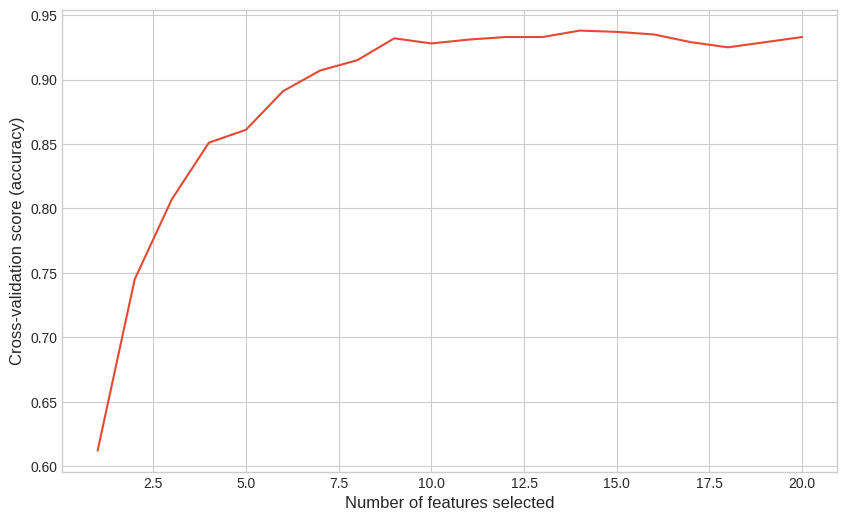

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Example dataset - replace this with your dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Instantiate the model (RandomForest)
rf = RandomForestClassifier(random_state=42)

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RFECV: Recursive Feature Elimination with Cross-Validation
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring='accuracy', n_jobs=-1)

# Fit the model
rfecv.fit(X, y)

# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

# The optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Which features are selected
print(f"Selected features: {np.where(rfecv.support_ == True)[0]}")

# Ranking of features
print(f"Feature ranking: {rfecv.ranking_}")

# Plotting the cross-validation scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
# Access the cross-validation results using cv_results_
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# **Dataset Balancing**

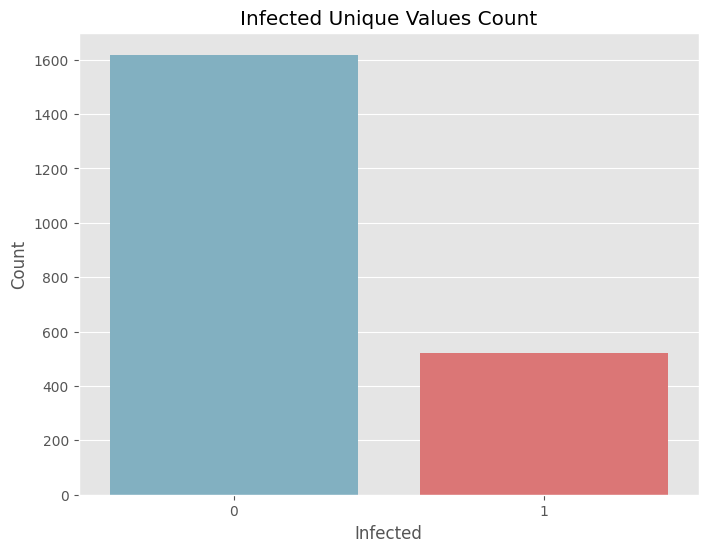

In [ ]:
# prompt: change the color to green and yellow

plt.figure(figsize=(8, 6))
sns.countplot(x='infected', data=df, palette=['#78B5CB', '#EC6565'])  # Use palette to set colors
plt.title('Infected Unique Values Count')
plt.xlabel('Infected')
plt.ylabel('Count')
plt.show()

## Resmapling and SMOTE

In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Corrected variable name from 'mote' to 'smote'
smote = SMOTE(random_state=2024)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print(X_train_resampled.shape)
print(X_test.shape)
print(y_train_resampled.shape)
print(y_test.shape)

(2582, 36)
(428, 36)
(2582,)
(428,)


In [ ]:
# prompt: check total number of infected and not infected from this dataset

# Count the number of infected and not infected individuals
infected_count = df['infected'].value_counts()[1]
not_infected_count = df['infected'].value_counts()[0]

# Print the results
print("Total number of infected individuals:", infected_count)
print("Total number of not infected individuals:", not_infected_count)


Total number of infected individuals: 521
Total number of not infected individuals: 1618


In [ ]:
len(y_train)

1711

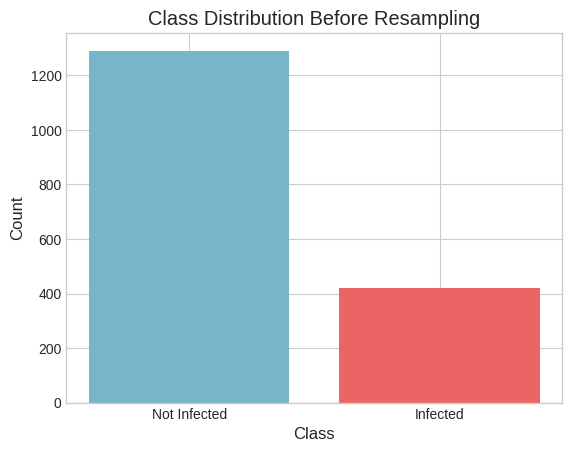

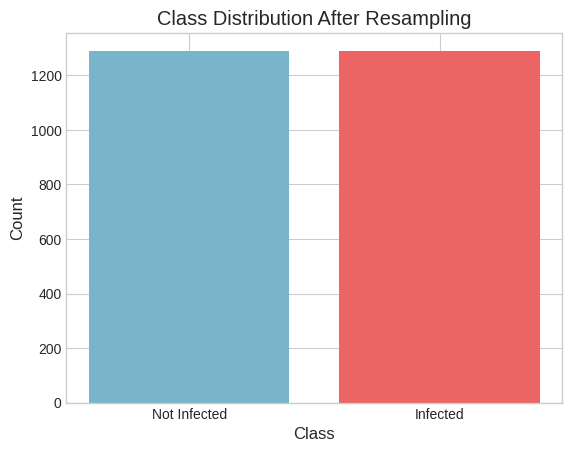

In [ ]:
`# prompt: generate a bar chart of before resampling and after resampling

import numpy as np
import matplotlib.pyplot as plt

# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

# Before resampling
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color=['#78B5CB', '#EC6565'])
plt.title('Class Distribution Before Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(unique, ['Not Infected', 'Infected'])  # Set x-axis labels
plt.show()
# After resampling
unique_resampled, counts_resampled = np.unique(y_train_resampled, return_counts=True)
plt.bar(unique_resampled, counts_resampled, color=['#78B5CB', '#EC6565'])
plt.title('Class Distribution After Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(unique_resampled, ['Not Infected', 'Infected'])  # Set x-axis labels
plt.show()


# **Applying Models**

In [ ]:
#Cek categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

""
0
1
2
3
4


**Model building**

In [ ]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

## XGBoost Classifier

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

Training Accuracy: 0.8813559322033898
Testing Accuracy: 0.8574766355140186
                                  
Cross-Validation Scores: [0.85131195 0.83918129 0.85964912 0.8625731  0.8625731 ]
Mean Cross-Validation Score: 0.8550577123079808
                                  


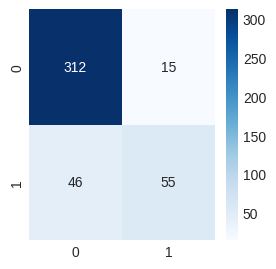

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       327
           1       0.79      0.54      0.64       101

    accuracy                           0.86       428
   macro avg       0.83      0.75      0.78       428
weighted avg       0.85      0.86      0.85       428

                                  
Precision = 0.7857142857142857
Recall = 0.5445544554455446
F1 Score = 0.6432748538011697
ROC AUC = 0.8939958216005086


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train
xgb = XGBClassifier(n_estimators=300,max_depth=2, random_state=150, learning_rate=0.02)
xgb.fit(X_train, y_train)

# Predict
y_predicted_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print accuracy
print("Training Accuracy:", xgb.score(X_train, y_train))
print("Testing Accuracy:", xgb.score(X_test, y_test))
print("                                  ")

# Perform cross-validation
cv_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluation
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_xgb)
print(cr)
print("                                  ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_xgb)
recall = recall_score(y_test, y_predicted_xgb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_xgb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_xgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgb)
print("ROC AUC =", roc_auc)


## K-Nearest Neighbors Algorithm

Training Accuracy: 0.8386908240794857
Testing Accuracy: 0.8317757009345794
                               
Cross-Validation Scores: [0.82507289 0.77192982 0.8245614  0.82748538 0.83625731]
Mean Cross-Validation Score: 0.8170613608852062
                                  


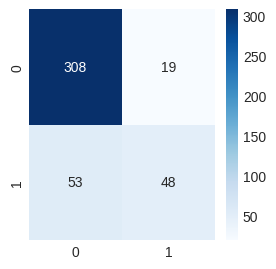

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       327
           1       0.72      0.48      0.57       101

    accuracy                           0.83       428
   macro avg       0.78      0.71      0.73       428
weighted avg       0.82      0.83      0.82       428

                               
Precision = 0.7164179104477612
Recall = 0.4752475247524752
F1 Score = 0.5714285714285715
ROC AUC = 0.828715899112847


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the k-NN classifier with additional hyperparameters
knn = KNeighborsClassifier(
    n_neighbors=20, # Number of neighbors to use
    weights='uniform',  # or 'distance'
    algorithm='auto',  # 'ball_tree', 'kd_tree', 'brute'
    leaf_size=15,  # Leaf size for 'ball_tree' or 'kd_tree'
    p=2,  # Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
    metric='minkowski',  # Distance metric to use
    metric_params=None,  # Additional keyword arguments for the metric function
    n_jobs=-1  # Number of parallel jobs to run
)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print training and testing accuracy
print("Training Accuracy:", knn.score(X_train, y_train))
print("Testing Accuracy:", knn.score(X_test, y_test))

print("                               ")
# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_knn)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_pred_knn)
print(cr)

print("                               ")

# Precision and Recall
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_pred_knn)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
print("ROC AUC =", roc_auc)

##DecisionTree Classifier

Training Accuracy: 0.8702513150204558
Testing Accuracy: 0.8271028037383178
                               
Cross-Validation Scores: [0.85714286 0.8128655  0.83625731 0.85087719 0.85087719]
Mean Cross-Validation Score: 0.8416040100250628
                                  


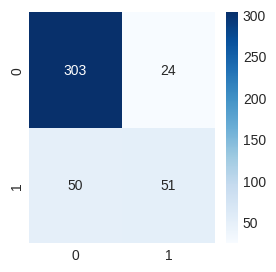

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       327
           1       0.68      0.50      0.58       101

    accuracy                           0.83       428
   macro avg       0.77      0.72      0.74       428
weighted avg       0.82      0.83      0.82       428

                               
Precision = 0.68
Recall = 0.504950495049505
F1 Score = 0.5795454545454545
ROC AUC = 0.8205407696732976


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the classifier with additional hyperparameters
dt = DecisionTreeClassifier(
    criterion='gini',  # or 'entropy'
    splitter='best',  # or 'random'
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=6,
    max_features=None,  # or a number or 'auto', 'sqrt', 'log2'
    max_leaf_nodes=None,  # or an integer
    min_impurity_decrease=0.0,
    class_weight=None,  # or a dictionary {class_label: weight}
    random_state=100
)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


# Print training and testing accuracy
print("Training Accuracy:", dt.score(X_train, y_train))
print("Testing Accuracy:", dt.score(X_test, y_test))

print("                               ")
# Perform cross-validation
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_pred_dt)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_pred_dt)
print(cr)

print("                               ")

# Precision and Recall
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
print("ROC AUC =", roc_auc)

## Logistic regression

Training Accuracy: 0.842781998831093
Testing Accuracy: 0.8341121495327103
                               
Cross-Validation Scores: [0.8483965  0.80701754 0.8245614  0.85672515 0.85380117]
Mean Cross-Validation Score: 0.8381003529231241
                                  


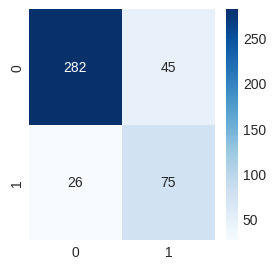

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       327
           1       0.62      0.74      0.68       101

    accuracy                           0.83       428
   macro avg       0.77      0.80      0.78       428
weighted avg       0.85      0.83      0.84       428

                                                
Precision = 0.625
Recall = 0.7425742574257426
F1 Score = 0.6787330316742081
                                                
ROC AUC = 0.8929663608562691


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression classifier with additional hyperparameters
log_reg = LogisticRegression(
    solver='liblinear',     # Solver to use
    C=3.0,                  # Inverse of regularization strength
    penalty='l2',           # Regularization type
    max_iter=50,           # Maximum number of iterations
    tol=1e-7,               # Tolerance for stopping criteria
    class_weight='balanced',# Automatically adjust weights inversely proportional to class frequencies
    fit_intercept=True,     # Include intercept in the model
    random_state=200       # Seed for random number generator
)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_predicted_log = log_reg.predict(X_test)
y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print training and testing accuracy
print("Training Accuracy:", log_reg.score(X_train, y_train))
print("Testing Accuracy:", log_reg.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_predicted_log)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_log)
print(cr)
print("                                                ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_log)
recall = recall_score(y_test, y_predicted_log)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_log)
print("F1 Score =", f1)
print("                                                ")
# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_log)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log)
print("ROC AUC =", roc_auc)


## GradientBoosting Classifier

Training Accuracy: 0.8836937463471654
Testing Accuracy: 0.866822429906542
                               
Cross-Validation Scores: [0.8483965  0.82748538 0.87134503 0.85964912 0.86549708]
Mean Cross-Validation Score: 0.8544746219289721
                                  


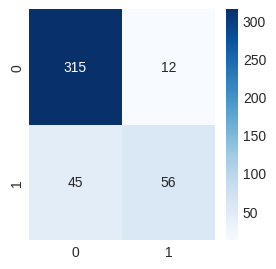

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       327
           1       0.82      0.55      0.66       101

    accuracy                           0.87       428
   macro avg       0.85      0.76      0.79       428
weighted avg       0.86      0.87      0.86       428

                                                
Precision = 0.8235294117647058
Recall = 0.5544554455445545
F1 Score = 0.6627218934911243
ROC AUC = 0.8833681533290945


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the classifier with additional hyperparameters
gbc = GradientBoostingClassifier(
    learning_rate=0.01,  # Controls the contribution of each tree
    n_estimators=500,    # Number of boosting stages
    max_depth=2,         # Maximum depth of each tree
    subsample=0.8,       # Fraction of samples used for fitting each tree
    min_samples_split=20,# Minimum number of samples required to split an internal node
    random_state=100
)

# Train the model
gbc.fit(X_train, y_train)

# Predict on the test set
y_predicted_gb = gbc.predict(X_test)
y_pred_proba_gb = gbc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print training and testing accuracy
print("Training Accuracy:", gbc.score(X_train, y_train))
print("Testing Accuracy:", gbc.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_predicted_gb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gb)
print(cr)
print("                                                ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_gb)
recall = recall_score(y_test, y_predicted_gb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_gb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_gb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gb)
print("ROC AUC =", roc_auc)


## AdaBoost Classifier

Training Accuracy: 0.831677381648159
Testing Accuracy: 0.8271028037383178
                               
Cross-Validation Scores: [0.82215743 0.79532164 0.84795322 0.83040936 0.83918129]
Mean Cross-Validation Score: 0.8270045862956712
                                  


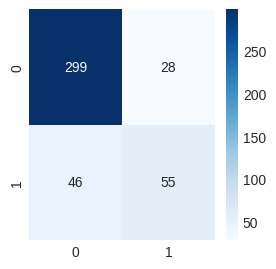

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       327
           1       0.66      0.54      0.60       101

    accuracy                           0.83       428
   macro avg       0.76      0.73      0.74       428
weighted avg       0.82      0.83      0.82       428

                                        
Precision = 0.6626506024096386
Recall = 0.5445544554455446
F1 Score = 0.5978260869565218
ROC AUC = 0.8682895812517032


In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Train
ada = AdaBoostClassifier(n_estimators=400,
                         learning_rate=0.01,
                         algorithm='SAMME.R',
                         random_state=50)

ada.fit(X_train, y_train)

# Predict
y_predicted_ab = ada.predict(X_test)
y_pred_proba_ab = ada.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

print("Training Accuracy:", ada.score(X_train, y_train))
print("Testing Accuracy:", ada.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Confusion matrix
cm = confusion_matrix(y_test, y_predicted_ab)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

# Classification report
cr = classification_report(y_test, y_predicted_ab)
print(cr)
print("                                        ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_ab)
recall = recall_score(y_test, y_predicted_ab)
f1 = f1_score(y_test, y_predicted_ab)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_ab)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_ab)
print("ROC AUC =", roc_auc)

## Light GradientBoosting Machine Classifer

In [ ]:
!pip install lightgbm

[LightGBM] [Info] Number of positive: 420, number of negative: 1291
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5264
[LightGBM] [Info] Number of data points in the train set: 1711, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245470 -> initscore=-1.122918
[LightGBM] [Info] Start training from score -1.122918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

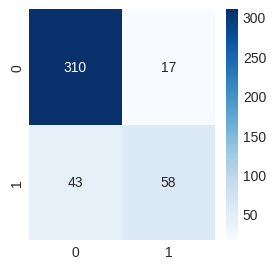

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       327
           1       0.77      0.57      0.66       101

    accuracy                           0.86       428
   macro avg       0.83      0.76      0.79       428
weighted avg       0.85      0.86      0.85       428

                                  
Precision = 0.7733333333333333
Recall = 0.5742574257425742
F1 Score = 0.6590909090909091
ROC AUC = 0.9010203772670845


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize LGBMClassifier with parameters to avoid overfitting
lgb = LGBMClassifier(
    num_leaves=20,           # Reduce number of leaves to avoid overfitting
    max_depth=2,             # Reduce max depth of the tree
    learning_rate=0.02,      # Decrease learning rate
    n_estimators=450,        # Increase number of boosting iterations
    reg_alpha=0.2,           # Add L1 regularization term
    reg_lambda=0.7,          # Add L2 regularization term
    objective='binary',      # Objective function
    subsample=0.8,           # Subsample ratio of the training instance
    colsample_bytree=0.8,    # Subsample ratio of columns when constructing each tree
    random_state=70,         # Random number seed for reproducibility
    n_jobs=-1                # Number of parallel threads
)

# Train the model with early stopping
lgb.fit(X_train,y_train)

# Predict
y_predicted_lgb = lgb.predict(X_test)
y_pred_proba_lgb = lgb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print accuracy
print("Training Accuracy:", lgb.score(X_train, y_train))
print("Testing Accuracy:", lgb.score(X_test, y_test))
print("                                  ")

# Perform cross-validation
cv_scores = cross_val_score(lgb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")
# Print accuracy
print("Training Accuracy:", lgb.score(X_train, y_train))
print("Testing Accuracy:", lgb.score(X_test, y_test))
print("                        ")
# Evaluation
cm = confusion_matrix(y_test, y_predicted_lgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_lgb)
print(cr)
print("                                  ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_lgb)
recall = recall_score(y_test, y_predicted_lgb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_lgb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_lgb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lgb)
print("ROC AUC =", roc_auc)

## Random Forest

Training Accuracy: 0.8702513150204558
Testing Accuracy: 0.8411214953271028
                               
Cross-Validation Scores: [0.8483965  0.80994152 0.86549708 0.83625731 0.85672515]
Mean Cross-Validation Score: 0.843363510817861
                                  


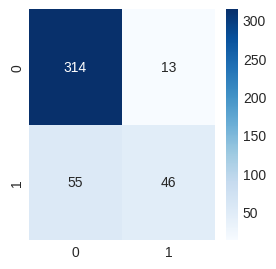

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       327
           1       0.78      0.46      0.58       101

    accuracy                           0.84       428
   macro avg       0.82      0.71      0.74       428
weighted avg       0.83      0.84      0.83       428

Precision = 0.7796610169491526
Recall = 0.45544554455445546
F1 Score = 0.5750000000000001
ROC AUC = 0.871801859084991


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the model
rf = RandomForestClassifier(max_depth=4, random_state=85, n_estimators=500)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print accuracy
print("Training Accuracy:", rf.score(X_train, y_train))
print("Testing Accuracy:", rf.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

# Classification report
cr = classification_report(y_test, y_pred_rf)
print(cr)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
print("ROC AUC =", roc_auc)

## Gausssian Naive Bayes Classifier

Training Accuracy: 0.7931034482758621
Testing Accuracy: 0.7757009345794392
                               
Cross-Validation Scores: [0.79300292 0.77777778 0.78362573 0.79532164 0.80116959]
Mean Cross-Validation Score: 0.7901795304588001
                                  


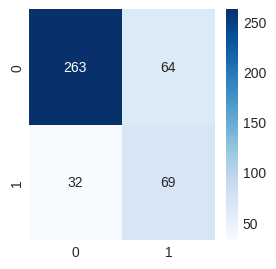

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       327
           1       0.52      0.68      0.59       101

    accuracy                           0.78       428
   macro avg       0.71      0.74      0.72       428
weighted avg       0.80      0.78      0.79       428

                                                
Precision = 0.518796992481203
Recall = 0.6831683168316832
F1 Score = 0.5897435897435898
ROC AUC = 0.8316528900596482


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Initialize the Gaussian Naive Bayes classifier with parameters
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predict on the test set
y_predicted_gnb = gnb.predict(X_test)
y_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Print training and testing accuracy
print("Training Accuracy:", gnb.score(X_train, y_train))
print("Testing Accuracy:", gnb.score(X_test, y_test))
print("                               ")

# Perform cross-validation
cv_scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("                                  ")

# Evaluate the model
cm = confusion_matrix(y_test, y_predicted_gnb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.8g')
plt.show()

cr = classification_report(y_test, y_predicted_gnb)
print(cr)
print("                                                ")

# Precision and Recall
precision = precision_score(y_test, y_predicted_gnb)
recall = recall_score(y_test, y_predicted_gnb)
print("Precision =", precision)
print("Recall =", recall)
f1 = f1_score(y_test, y_predicted_gnb)
print("F1 Score =", f1)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba_gnb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gnb)
print("ROC AUC =", roc_auc)

# **Summary of predictions**

## Accuracy and cross validation accuracy graph

[LightGBM] [Info] Number of positive: 336, number of negative: 1032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5243
[LightGBM] [Info] Number of data points in the train set: 1368, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245614 -> initscore=-1.122143
[LightGBM] [Info] Start training from score -1.122143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

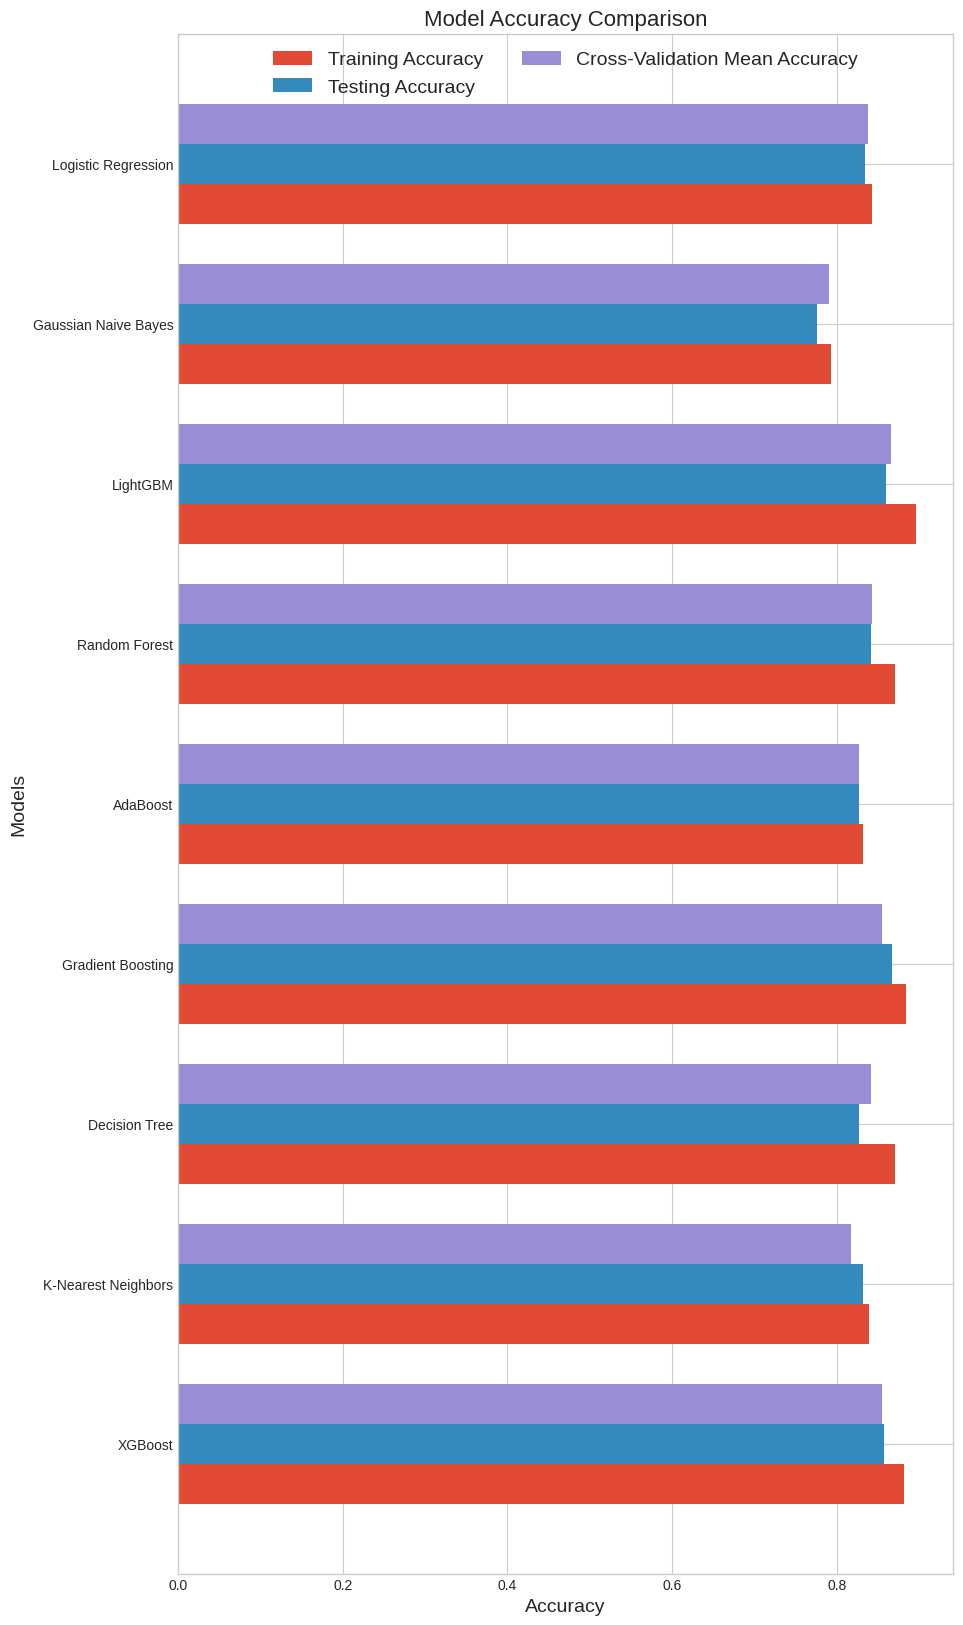

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a list of models
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB() # Initialize gnb here
models = [
    ("XGBoost", xgb),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", dt),
    ("Gradient Boosting", gbc),
    ("AdaBoost", ada),
    ("Random Forest", rf),
    ("LightGBM", lgb),
    ("Gaussian Naive Bayes", gnb),
    ("Logistic Regression", log_reg)
]

# Create a list to store the training and testing accuracy for each model
training_accuracy = []
testing_accuracy = []
cv_scores_means = []

# Loop through each model, calculate the training and testing accuracy, and perform cross-validation
for name, model in models:
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_means.append(cv_scores.mean())

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Append the accuracy scores
    training_accuracy.append(model.score(X_train, y_train))
    testing_accuracy.append(model.score(X_test, y_test))

# Convert lists to numpy arrays for easier manipulation
training_accuracy = np.array(training_accuracy)
testing_accuracy = np.array(testing_accuracy)
cv_scores_means = np.array(cv_scores_means)

# Create a bar chart to compare the training, testing accuracy, and cross-validation mean scores for each model
plt.figure(figsize=(10, 20), facecolor='white')  # Set the background color to white
bar_width = 0.25
index = np.arange(len(models))

plt.barh(index, training_accuracy, bar_width, label="Training Accuracy")
plt.barh(index + bar_width, testing_accuracy, bar_width, label="Testing Accuracy")
plt.barh(index + 2 * bar_width, cv_scores_means, bar_width, label="Cross-Validation Mean Accuracy")

plt.yticks(index + bar_width, [model[0] for model in models])
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Models", fontsize=14)

# Adjust the legend to be placed outside the plot in a single line
plt.legend(loc='upper center', fontsize=14, ncol=2)

# Adjust layout to make space for the legend
# plt.tight_layout(rect=[0, 0, 1, 0.9])

plt.show()


## Graph of overall result summary for each classifiers

[LightGBM] [Info] Number of positive: 336, number of negative: 1032
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5243
[LightGBM] [Info] Number of data points in the train set: 1368, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245614 -> initscore=-1.122143
[LightGBM] [Info] Start training from score -1.122143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

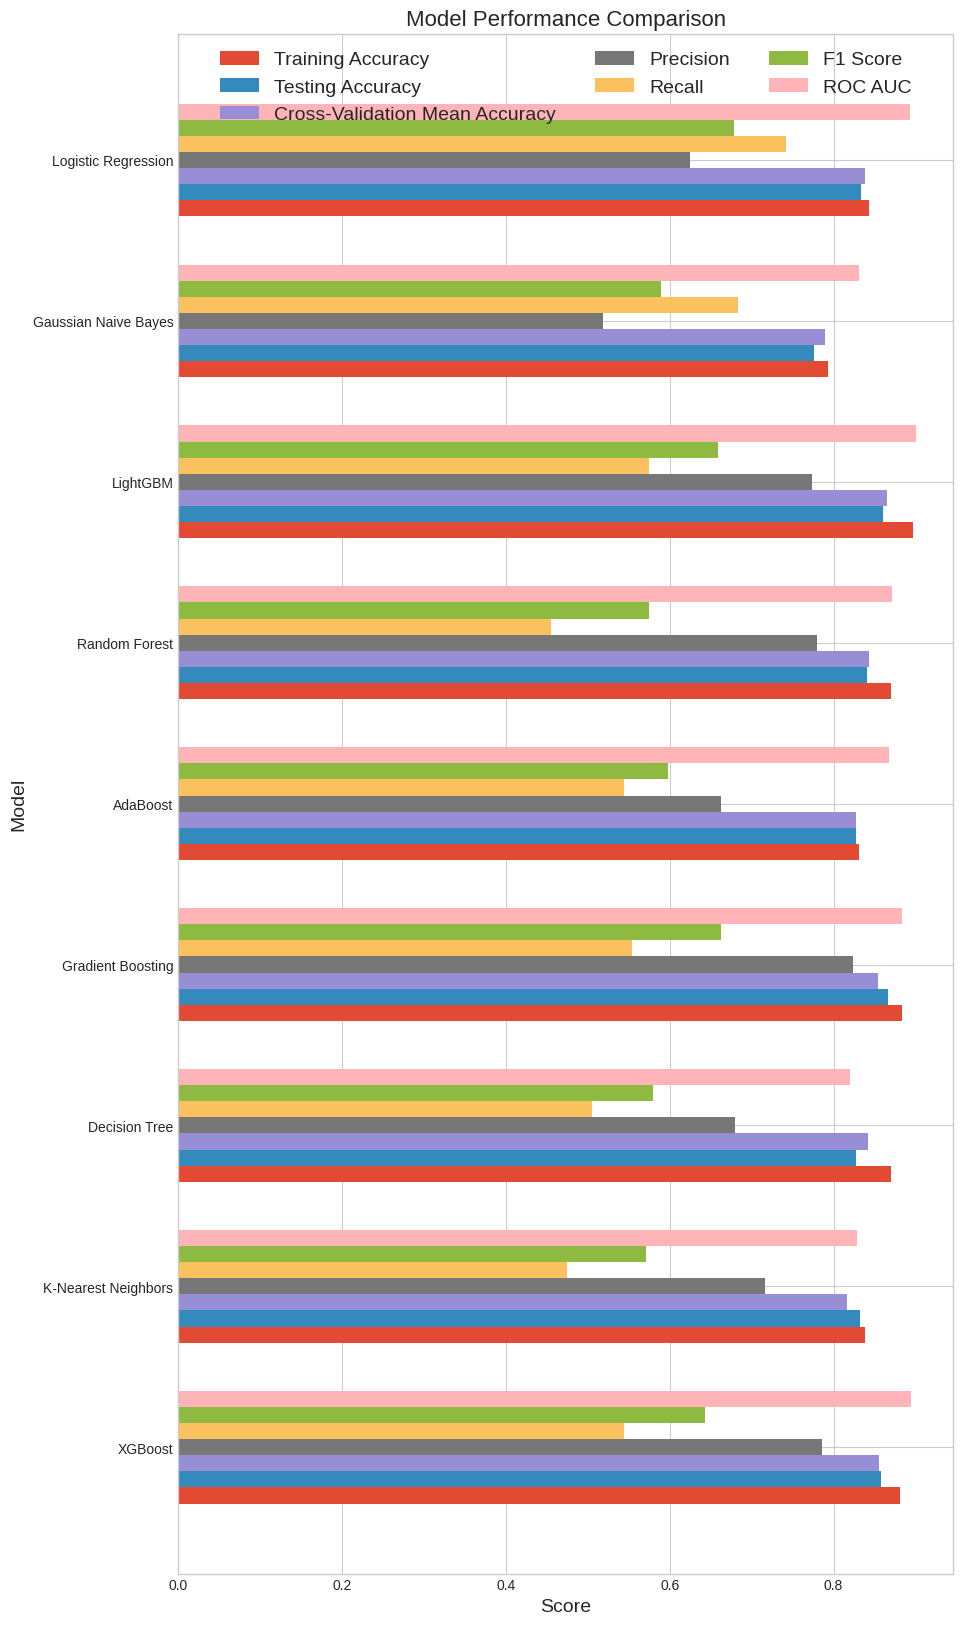

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Create a list of models
models = [
    ("XGBoost", xgb),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", dt),
    ("Gradient Boosting", gbc),
    ("AdaBoost", ada),
    ("Random Forest", rf),
    ("LightGBM", lgb),
    ("Gaussian Naive Bayes", gnb),
    ("Logistic Regression", log_reg)
]

# Initialize lists to store the metrics for each model
training_accuracy = []
testing_accuracy = []
cv_scores_means = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Loop through each model, calculate metrics and perform cross-validation
for name, model in models:
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_means.append(cv_scores.mean())

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate and store the metrics
    training_accuracy.append(model.score(X_train, y_train))
    testing_accuracy.append(model.score(X_test, y_test))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))

# Convert lists to numpy arrays for easier manipulation
training_accuracy = np.array(training_accuracy)
testing_accuracy = np.array(testing_accuracy)
cv_scores_means = np.array(cv_scores_means)
precision_scores = np.array(precision_scores)
recall_scores = np.array(recall_scores)
f1_scores = np.array(f1_scores)
roc_auc_scores = np.array(roc_auc_scores)

# Plotting
metrics = ['Training Accuracy', 'Testing Accuracy', 'Cross-Validation Mean Accuracy',
           'Precision', 'Recall', 'F1 Score', 'ROC AUC']
values = [training_accuracy, testing_accuracy, cv_scores_means,
          precision_scores, recall_scores, f1_scores, roc_auc_scores]

plt.figure(figsize=(10, 20), facecolor='white')  # Set the background color to white
bar_width = 0.1
index = np.arange(len(models))

for i, value in enumerate(values):
    plt.barh(index + i * bar_width, value, bar_width, label=metrics[i])

plt.yticks(index + bar_width * (len(values) - 1) / 2, [model[0] for model in models])
plt.title("Model Performance Comparison", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Model", fontsize=14)

# Adjust the legend to be placed outside the plot
plt.legend(loc='upper center', fontsize=14, ncol=3)

plt.show()


## Recciver Operating Characteristics(ROC) Curve of all Classifers

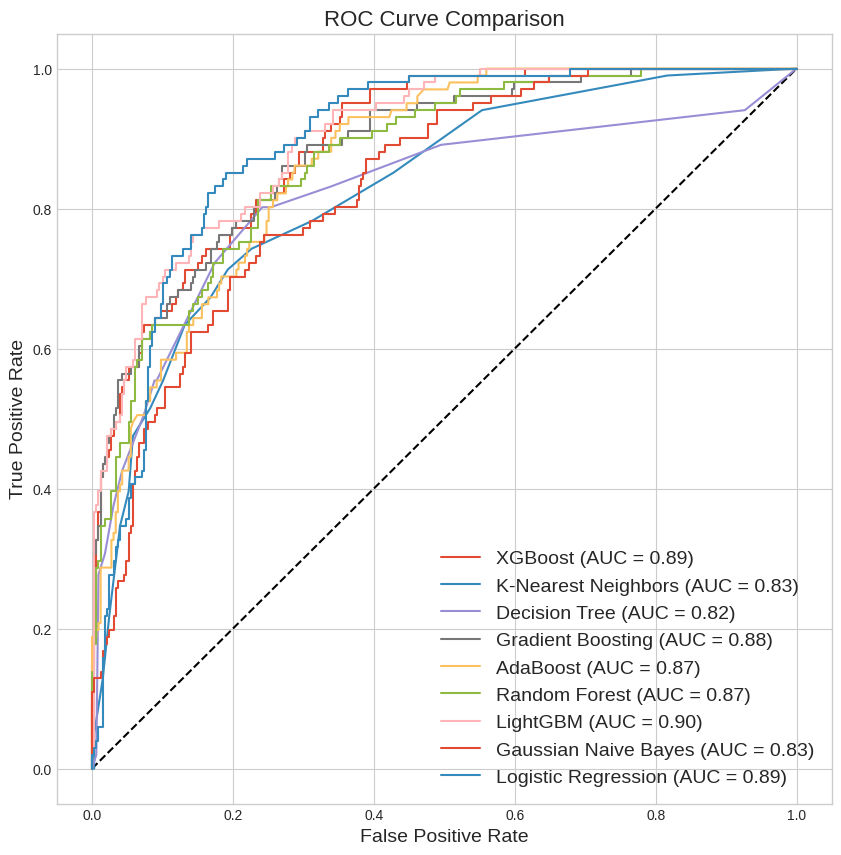

In [ ]:
# prompt: make ROC curves of all classifer

# Create a list of models
models = [
    ("XGBoost", xgb),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", dt),
    ("Gradient Boosting", gbc),
    ("AdaBoost", ada),
    ("Random Forest", rf),
    ("LightGBM", lgb),
    ("Gaussian Naive Bayes", gnb),
    ("Logistic Regression", log_reg)
]

# Plot the ROC curves for each model
plt.figure(figsize=(10, 10), facecolor='white')  # Set the background color to white
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line

for name, model in models:
    # Predict probabilities on the test set
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate and store the ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.show()


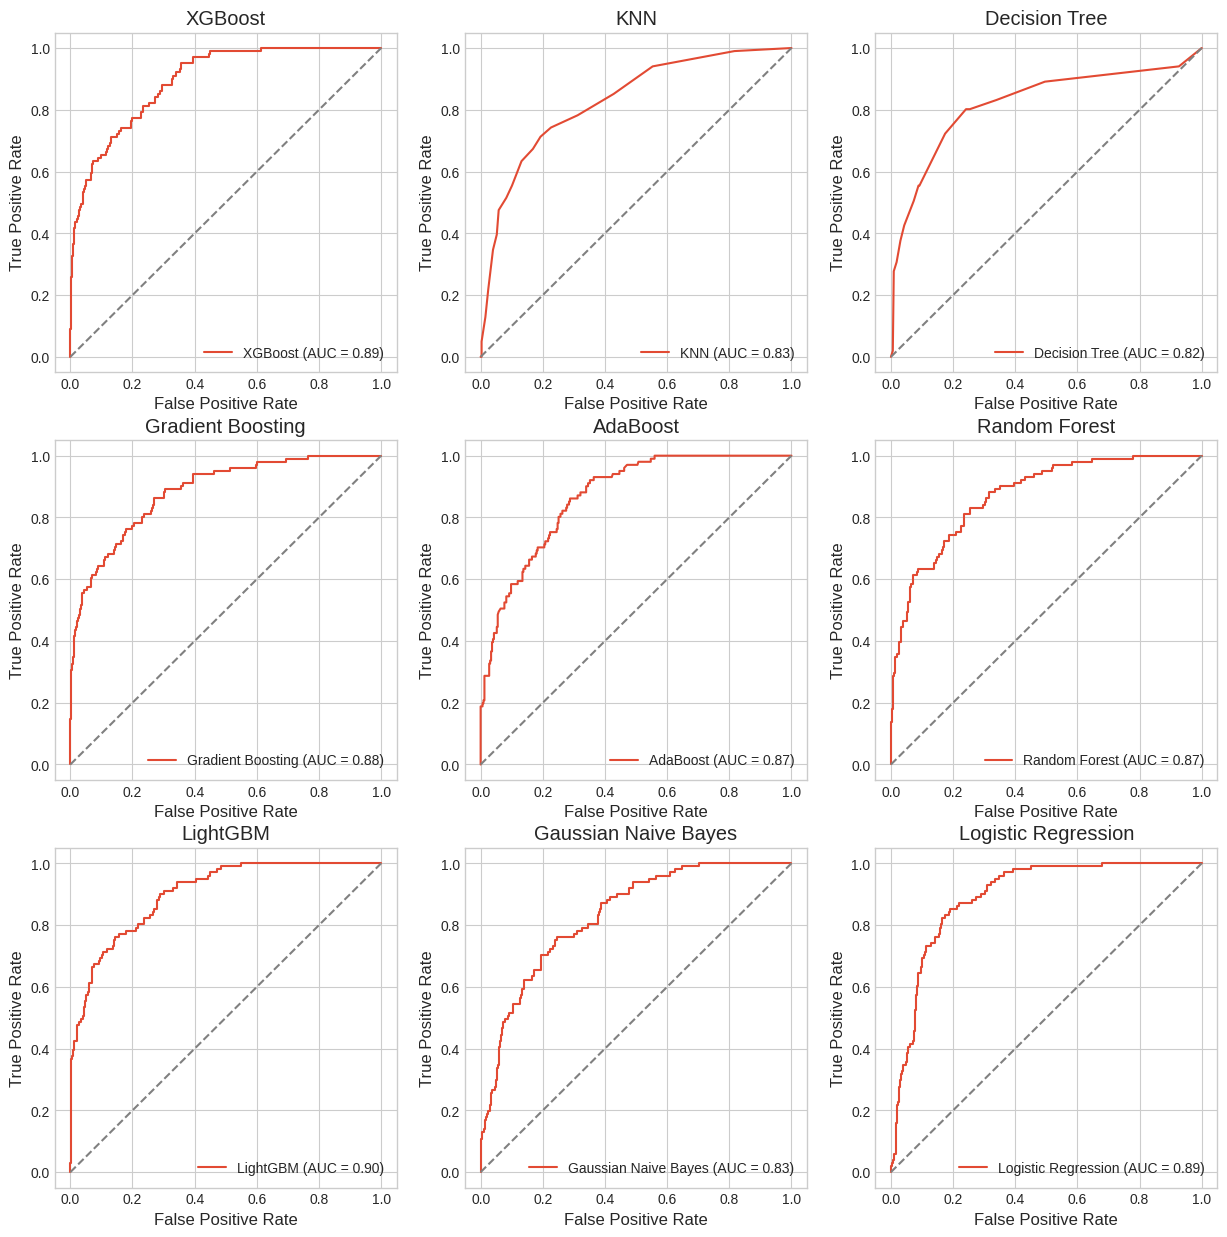

In [ ]:
# prompt: ROC curves of all classifer

# Create a figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), facecolor='white')

# Define the models and their names
models = [
    (xgb, 'XGBoost'),
    (knn, 'KNN'),
    (dt, 'Decision Tree'),
    (gbc, 'Gradient Boosting'),
    (ada, 'AdaBoost'),
    (rf, 'Random Forest'),
    (lgb, 'LightGBM'),
    (gnb, 'Gaussian Naive Bayes'),
    (log_reg, 'Logistic Regression')
]

# Loop through each model and plot the ROC curve
for i, (model, name) in enumerate(models):
    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    axs[i // 3, i % 3].plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    axs[i // 3, i % 3].plot([0, 1], [0, 1], color='grey', linestyle='--')
    axs[i // 3, i % 3].set_title(name)
    axs[i // 3, i % 3].set_xlabel('False Positive Rate')
    axs[i // 3, i % 3].set_ylabel('True Positive Rate')
    axs[i // 3, i % 3].legend(loc='lower right')

# Show the plot
plt.show()


## Important features analysis

                     Feature  Importance
33    time_cd420_interaction    0.226438
32     time_cd40_interaction    0.109222
13                     strat    0.066939
16                    offtrt    0.051336
18                     cd420    0.044584
17                      cd40    0.042623
31  time_symptom_interaction    0.039384
30    time_treat_interaction    0.037979
10                      race    0.037277
35    time_cd820_interaction    0.037020
9                    preanti    0.036856
23         cd420_cd820_ratio    0.034998
34     time_cd80_interaction    0.034241
25              immune_index    0.034129
4                       homo    0.027720
0                        trt    0.022374
1                        age    0.021754
6                     karnof    0.018111
2                       wtkg    0.017864
27                    z_cd80    0.017540
20                     cd820    0.014558
19                      cd80    0.012712
28                   z_cd420    0.009457
21            wt

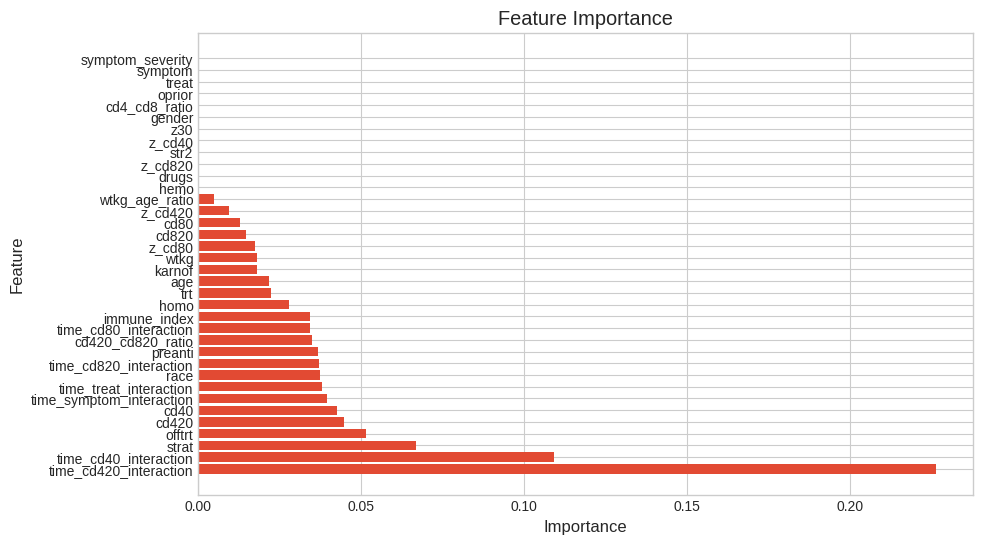

In [ ]:
# prompt: give me list of the important features

# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

# Assuming 'xgb' is your trained XGBoost model
importance = xgb.feature_importances_

# Get feature names directly from the trained XGBoost model
feature_names = xgb.get_booster().feature_names

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print or visualize the important features
print(feature_importance_df)

# Or, plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

## Best model determining

In [ ]:
# prompt: find me the best model from all

# Create a list of models
models = [
    ("XGBoost", xgb),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", dt),
    ("Gradient Boosting", gbc),
    ("AdaBoost", ada),
    ("Random Forest", rf),
    ("LightGBM", lgb),
    ("Gaussian Naive Bayes", gnb),
    ("Logistic Regression", log_reg)
]

# Initialize variables to store the best model and its score
best_model = None
best_score = 0

# Loop through each model, calculate a performance metric (e.g., accuracy), and update the best model
for name, model in models:
    # Fit the model on the training data (if not already fitted)
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the performance metric (replace 'accuracy_score' with your desired metric)
    score = accuracy_score(y_test, y_pred)

    # Update the best model if the current model has a better score
    if score > best_score:
        best_score = score
        best_model = (name, model)

# Print the best model and its score
print(f"Best Model: {best_model[0]}")
print(f"Best Score: {best_score}")


[LightGBM] [Info] Number of positive: 420, number of negative: 1291
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5264
[LightGBM] [Info] Number of data points in the train set: 1711, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.245470 -> initscore=-1.122918
[LightGBM] [Info] Start training from score -1.122918
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

#**Explainable AI(XAI)**

## Explainable AI on Gradient Boosting Classifer

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.6 MB/s eta 0:00:00


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier


# Initialize the classifier with additional hyperparameters
gbc = GradientBoostingClassifier(
    learning_rate=0.01,  # Controls the contribution of each tree
    n_estimators=500,    # Number of boosting stages
    max_depth=2,         # Maximum depth of each tree
    subsample=0.8,       # Fraction of samples used for fitting each tree
    min_samples_split=20,# Minimum number of samples required to split an internal node
    random_state=100
)

# Train the model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2,
                           min_samples_split=20, n_estimators=500,
                           random_state=100, subsample=0.8)

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(gbc, X_train)
# Disable additivity check
shap_values = explainer(X_test, check_additivity=False)

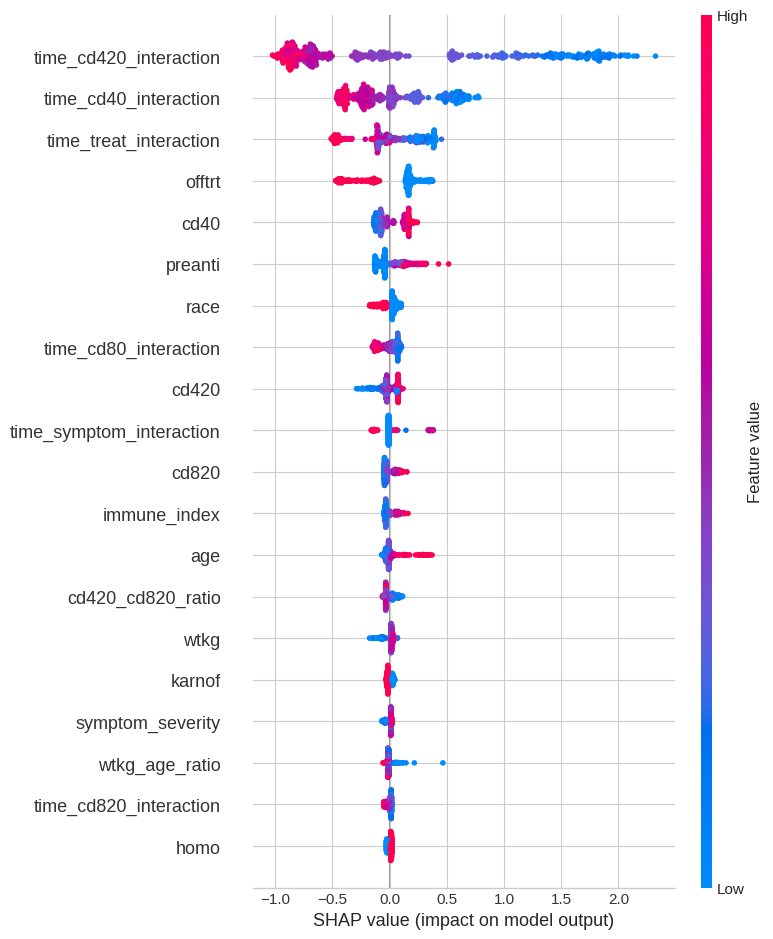

In [ ]:
import shap
import matplotlib.pyplot as plt

# Set background color to light (e.g., white)
plt.style.use('seaborn-whitegrid')

# Create a SHAP explainer object
explainer = shap.Explainer(gbc, X_train)

# Compute SHAP values (with additivity check disabled)
shap_values = explainer(X_test, check_additivity=False)

# Summary plot with a light background
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [ ]:
# Force plot for a single prediction
import matplotlib.pyplot as plt

shap.initjs()
# Visualize the contribution of each feature to the first prediction
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0])


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6d27c7b38440a5f99e8ca0f81c50a36ade8c71a7019df1dd39e46edc953583e9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values,
    mode='classification',
    feature_names=X_train.columns)
exp = explainer.explain_instance(X_test.iloc[28], gbc.predict_proba)
exp.show_in_notebook(show_table = True)

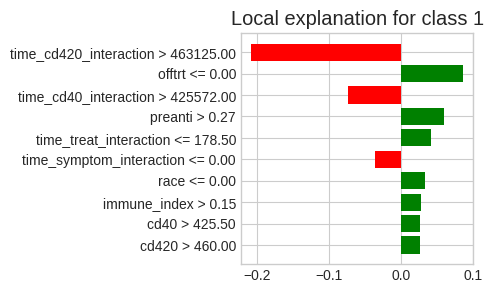

In [ ]:
import matplotlib.pyplot as plt

# Generate the LIME plot
fig = exp.as_pyplot_figure()

# Get the axes object from the figure
ax = fig.axes[0]

# Set the background color to white
ax.set_facecolor('white')

# Display the plot
plt.show()